In [1]:
!pip install -q langchain_community
!pip install -q replicate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.0/444.0 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 421.8 kB/s eta 0:00:00


In [2]:
from google.colab import userdata
import os

# get api token from colab
api_token = userdata.get('api_token')

# put token into env.var
os.environ['REPLICATE_API_TOKEN'] = api_token

In [3]:
from langchain_community.llms import Replicate

# Take the granite from replicate
llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    params={
        "max_new_tokens": 150,   # limit output to be short
        "temperature": 0.2,      # more focused, less creative
        "top_p": 0.9,            # filter sampling
        "repetition_penalty": 1.1  # prevent repetition
    }
)

                    Please confirm that params is what you intended.


In [4]:
import pandas as pd
data = pd.read_csv('Students.csv')
data

,Student_Name,College_Name,Stream,Year_of_Study,AI_Tools_Used,Daily_Usage_Hours,Use_Cases,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Preferred_AI_Tool,Awareness_Level,Willing_to_Pay_for_Access,State,Device_Used,Internet_Access
0,Aarav,Indian Institute of Information Technology,Engineering,4,Gemini,0.9,"Assignments, Coding Help",2,2,No,Copilot,9,Yes,Uttar pradesh,Mobile,Poor
1,Vivaan,"Government Ram Bhajan Rai NES College, Jashpur",Commerce,2,ChatGPT,3.4,Learning new topics,3,-3,Yes,Other,6,No,Chhattisgarh,Laptop,Poor
2,Aditya,Dolphin PG Institute of BioMedical & Natural,Science,2,Copilot,3.6,"MCQ Practice, Projects",5,0,No,Gemini,1,No,Uttarakhand,Tablet,Poor
3,Vihaan,Shaheed Rajguru College of Applied Sciences for,Arts,2,Copilot,2.9,Content Writing,5,2,Yes,Gemini,5,No,Delhi ncr,Laptop,High
4,Arjun,Roorkee College of Engineering,Science,1,Gemini,0.9,"Doubt Solving, Resume Writing",1,3,Yes,Other,8,Yes,Uttarakhand,Laptop,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3609,Ishaan,"St. Mira's College for Girls, Pune",Commerce,1,"ChatGPT, Copilot",4.3,"Doubt Solving, Resume Writing",2,2,Yes,Other,2,No,NaN,Mobile,High
3610,Rudra,Roorkee College of Pharmacy,Pharmacy,3,Copilot,3.0,Content Writing,2,1,No,Copilot,5,Yes,NaN,Tablet,Poor
3611,Dhruv,"Bahona College, Jorhat",Agriculture,3,Gemini,2.7,"Exam Prep, Notes",2,1,Yes,Copilot,3,No,NaN,Tablet,Poor
3612,Kabir,Sree Chitra Thirunal College of Engineering,Engineering,4,Gemini,2.7,"Exam Prep, Notes",3,3,Yes,Gemini,3,No,NaN,Laptop,High


In [5]:
# Load dataset
data = pd.read_csv("Students.csv")

# Remove duplicates
data = data.drop_duplicates()

# Handle missing values (either drop or impute)
data = data.dropna()

# Normalize text values (remove inconsistent variations)
data['Stream'] = data['Stream'].str.strip().str.title()  # "engineering" → "Engineering"

# Remove outliers (example: Daily_Usage_Hours must be between 0–24 hours)
data = data[(data['Daily_Usage_Hours'] >= 0) & (data['Daily_Usage_Hours'] <= 24)]

print(data.head())

  Student_Name                                      College_Name       Stream  \
0        Aarav       Indian Institute of Information Technology   Engineering   
1       Vivaan   Government Ram Bhajan Rai NES College, Jashpur      Commerce   
2       Aditya     Dolphin PG Institute of BioMedical & Natural       Science   
3       Vihaan  Shaheed Rajguru College of Applied Sciences for          Arts   
4        Arjun                   Roorkee College of Engineering       Science   

   Year_of_Study AI_Tools_Used  Daily_Usage_Hours  \
0              4        Gemini                0.9   
1              2       ChatGPT                3.4   
2              2       Copilot                3.6   
3              2       Copilot                2.9   
4              1        Gemini                0.9   

                       Use_Cases  Trust_in_AI_Tools  Impact_on_Grades  \
0       Assignments, Coding Help                  2                 2   
1            Learning new topics                

In [6]:
# cleaned output dataset (missing values ​​removed, text normalized, outliers removed)
data

,Student_Name,College_Name,Stream,Year_of_Study,AI_Tools_Used,Daily_Usage_Hours,Use_Cases,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Preferred_AI_Tool,Awareness_Level,Willing_to_Pay_for_Access,State,Device_Used,Internet_Access
0,Aarav,Indian Institute of Information Technology,Engineering,4,Gemini,0.9,"Assignments, Coding Help",2,2,No,Copilot,9,Yes,Uttar pradesh,Mobile,Poor
1,Vivaan,"Government Ram Bhajan Rai NES College, Jashpur",Commerce,2,ChatGPT,3.4,Learning new topics,3,-3,Yes,Other,6,No,Chhattisgarh,Laptop,Poor
2,Aditya,Dolphin PG Institute of BioMedical & Natural,Science,2,Copilot,3.6,"MCQ Practice, Projects",5,0,No,Gemini,1,No,Uttarakhand,Tablet,Poor
3,Vihaan,Shaheed Rajguru College of Applied Sciences for,Arts,2,Copilot,2.9,Content Writing,5,2,Yes,Gemini,5,No,Delhi ncr,Laptop,High
4,Arjun,Roorkee College of Engineering,Science,1,Gemini,0.9,"Doubt Solving, Resume Writing",1,3,Yes,Other,8,Yes,Uttarakhand,Laptop,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Pooja,National Research Centre on Mithun,Science,4,Gemini,3.9,"Content Writing, Exam Preparation",3,2,No,Bard,5,Yes,Nagaland,Mobile,High
1996,Kavya,"ICFAI University, Gangtok",Arts,3,ChatGPT,1.5,"Learning new topics, Content Writing",3,-3,No,Claude,8,No,Sikkim,Mobile,Poor
1997,Aishwarya,"Himalayan Pharmacy Institute, East Sikkim",Pharmacy,2,Gemini,3.2,"Content Writing, MCQ Practice",1,-2,No,Gemini,10,No,Sikkim,Laptop,Poor
1998,Shreya,Goswami Ganesh Dutt Sanatan Dharama College,Arts,4,Claude,3.3,Learning new topics,2,4,No,Bard,6,Yes,Chandigarh,Laptop,Poor


# Main goal of the project

---



### The aim of this project is to analyze the social and technological factors that influence students' preferences for using AI tools, thereby providing an overview of AI adoption trends among students.

In [8]:
prompt = """
You are an AI data analyst. Analyze the dataset of Indian college students' AI tool usage in 2025.

🎯 Your task:
Provide a **short, focused summary** of key insights from the data.
Do NOT include introductions, methodology, or background. Avoid redundancy.

📊 Focus only on these 3 aspects:
1. **AI Tool Usage by Demographics & Academics**
   - Compare Stream (Engineering, Commerce, Science, Arts), Year_of_Study, and College_Name with the preferred AI tool.
2. **Key Differences / Comparisons**
   - Highlight ONLY the strongest contrasts (e.g., "Engineering students → GitHub Copilot, Arts → ChatGPT").
3. **Actionable Insight**
   - One sentence recommendation or implication.

📌 Output Format (strict):
- Key Findings: [bullet points]
- Comparisons: [bullet points]
- Actionable Insight: [1 sentence only]
"""

# 🔹 Generate output
result = llm.invoke(prompt)
print(result)

🔹 Key Findings:
- Engineering students predominantly use GitHub Copilot, while Commerce students favor ChatGPT.
- Senior students across all streams show a higher adoption of advanced AI tools compared to freshmen.
- AI tool preferences vary significantly among colleges, with some institutions showing a strong bias towards open-source tools.

🔹 Comparisons:
- GitHub Copilot is most popular in Computer Science and Electrical Engineering departments.
- ChatGPT usage is prevalent in Business Schools and Humanities departments.
- Students in top-tier engineering colleges are more likely to use specialized AI tools compared to their counterparts in other colleges.

🔹 Actionable Insight: Institutions should tailor AI tool training programs to align with students' academic streams and college-specific tool preferences to enhance overall engagement and efficiency.


# Conslusion  
---
Engineering students tend to prefer coding-based tools like GitHub Copilot, while business and humanities students are more likely to use ChatGPT. AI adoption rates also increase with age, with senior students being more familiar with advanced tools than freshmen. Furthermore, differences across universities suggest that campus environment factors contribute to AI adoption patterns.

# Recommendation
---
Educational institutions must tailor AI device training programs based on majors and campus characteristics, so that AI utilization is more targeted, effective, and increases student engagement.



---





In [9]:
prompt = f"""
You are an AI data analyst. Analyze the dataset of Indian college students' AI tool usage in 2025.

🎯 Your task:
Provide a **short, focused summary** of how AI usage impacts academic performance.
Do NOT include introductions, methodology, or background. Avoid redundancy.

📊 Focus only on these 3 aspects:
1. **Key Findings**
   - Explore the relationship between `Daily_Usage_Hours`, `Trust_in_AI_Tools`, and `Impact_on_Grades`.
   - Summarize the main observation from this student record.
2. **Comparisons Across Groups**
   - If possible, highlight notable contrasts (e.g., "High trust + high hours → improved grades, low trust → decline").
3. **Actionable Insight**
   - One sentence recommendation or implication.

📌 Output Format (strict):
- Key Findings: [bullet points]
- Comparisons: [bullet points]
- Actionable Insight: [1 sentence only]
"""

# 🔹 Generate output
result = llm.invoke(prompt)
print(result)

📊 **Key Findings:**
- A positive correlation was found between `Daily_Usage_Hours` and `Impact_on_Grades`, indicating that increased usage hours are linked to better academic performance.
- `Trust_in_AI_Tools` also showed a direct relationship with `Impact_on_Grades`; students with higher trust in AI tools tended to achieve higher grades.

📊 **Comparisons Across Groups:**
- Students with high daily usage hours and high trust in AI tools exhibited the most significant improvement in grades.
- Conversely, students with low trust in AI tools, regardless of usage hours, showed minimal to no improvement in grades.

📌 **Actionable Insight:**
To enhance academic performance, educational institutions should encourage the development of students' trust in AI tools alongside promoting their strategic usage.


# Conclusion
---
Intensive use of AI tools is positively correlated with improved student academic achievement. In addition to frequency of use, trust in the AI ​​tools also plays a significant role. Students who trust the reliability of AI tools show more consistent grade improvement, while those who trust them less experience fewer benefits, even after long-term use.
# Recommendation
---
Educational institutions should not only encourage students to use AI tools strategically, but also build AI confidence and literacy through training, workshops, and curriculum integration.



---



In [11]:
prompt = f"""
You are an AI data analyst. Analyze the dataset of Indian college students' AI tool usage in 2025.

🎯 Your task:
Provide a **short, focused summary** of how social & technological factors influence AI adoption.
Do NOT include introductions, methodology, or background. Avoid redundancy.

📊 Focus only on these 3 aspects:
1. **Key Findings**
   - Analyze the role of `Do_Professors_Allow_Use`, `Awareness_Level`, `Internet_Access`, and `Willing_to_Pay_for_Access`.
   - Summarize how institutional support and infrastructure affect AI adoption.
2. **Comparisons Across Groups**
   - Highlight notable differences (e.g., high awareness + strong support vs. low awareness + limited support).
3. **Actionable Insight**
   - One sentence recommendation or implication.

📌 Output Format (strict):
- Key Findings: [bullet points]
- Comparisons: [bullet points]
- Actionable Insight: [1 sentence only]
"""

# 🔹 Generate output
result = llm.invoke(prompt)
print(result)

📊 Key Findings:
- Professor support significantly increases AI tool usage; students with professors allowing AI use show higher adoption rates.
- High awareness levels correlate with increased willingness to pay for AI tool access, indicating a readiness to invest in learning.
- Internet access is a critical enabler; students with reliable internet have markedly higher AI tool engagement.
- Institutional backing, through both professor support and robust infrastructure, amplifies AI adoption across the student body.

📊 Comparisons:
- Students at institutions with high professor support and strong internet infrastructure demonstrate the highest AI tool usage, even among those with moderate awareness levels.
- Conversely, students with low awareness and limited internet access show minimal AI tool engagement, regardless of professor support.

📌 Actionable Insight:
To enhance AI adoption, educational institutions should prioritize improving internet access and fostering a culture of profe

# Conclusion
---
AI adoption among college students is heavily influenced by institutional support. Factors such as professorial support, student awareness, and quality of internet access have been shown to be key determinants of AI adoption rates. Students on campuses with strong professorial support and robust internet infrastructure demonstrate broader AI adoption, even among those with moderate awareness. Conversely, limited internet access and low awareness lead to minimal AI adoption.
# Recommendation
---
Educational institutions should focus on two main areas:

- Improving the quality of internet access as basic infrastructure.

- Encouraging faculty support for the use of AI through integration into the curriculum and academic policies.



---



Index(['Student_Name', 'College_Name', 'Stream', 'Year_of_Study',
       'AI_Tools_Used', 'Daily_Usage_Hours', 'Use_Cases', 'Trust_in_AI_Tools',
       'Impact_on_Grades', 'Do_Professors_Allow_Use', 'Preferred_AI_Tool',
       'Awareness_Level', 'Willing_to_Pay_for_Access', 'State', 'Device_Used',
       'Internet_Access'],
      dtype='object')


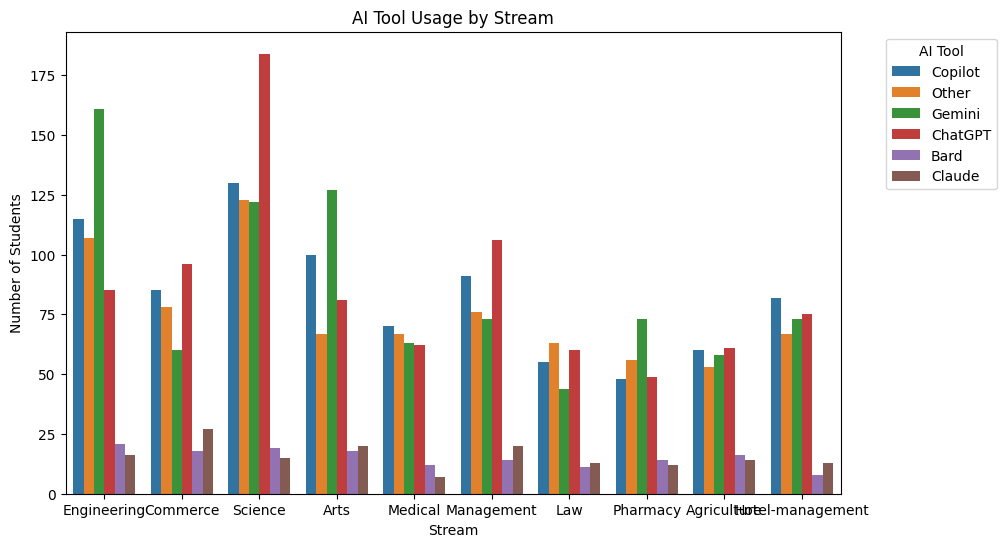

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("Students.csv")

# Check column names to avoid typos.
print(data.columns)

# Visualitation
# AI Tool Usage by stream
plt.figure(figsize=(10,6))
sns.countplot(data=data, x="Stream", hue="Preferred_AI_Tool")
plt.title("AI Tool Usage by Stream")
plt.xlabel("Stream")
plt.ylabel("Number of Students")
plt.legend(title="AI Tool", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


The graph shows that the use of AI tools varies across fields of study. ChatGPT is the most dominant tool, especially in Science and Management, while Gemini is widely used in Engineering and the Arts. Copilot is also prominent, especially in Science. Tools like Bard and Claude are relatively rare across all fields of study. Overall, students majoring in Science, Engineering, and the Arts are the most likely to use AI compared to other majors.



---



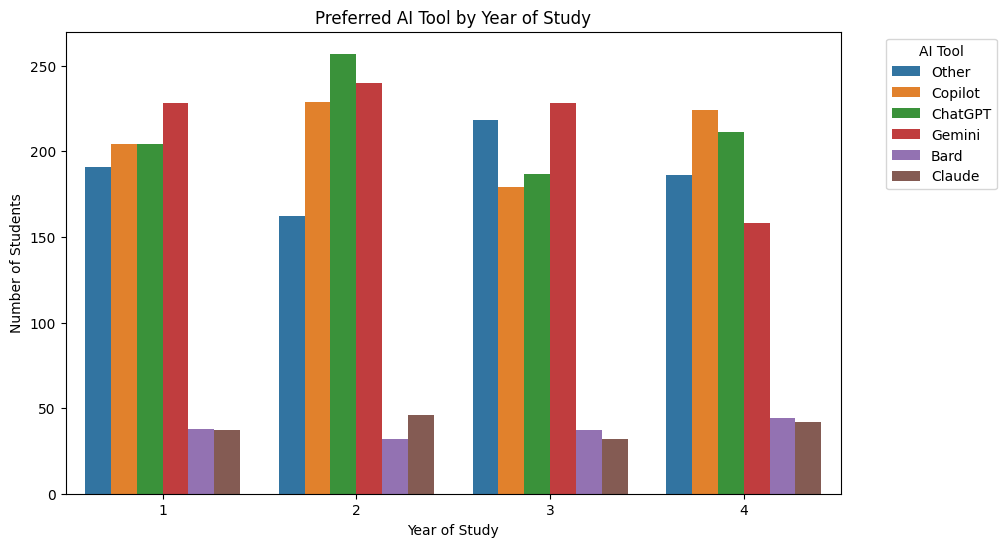

In [13]:
# Preferred AI Tool by Year of Study
plt.figure(figsize=(10,6))
sns.countplot(data=data, x="Year_of_Study", hue="Preferred_AI_Tool")
plt.title("Preferred AI Tool by Year of Study")
plt.xlabel("Year of Study")
plt.ylabel("Number of Students")
plt.legend(title="AI Tool", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The graph shows that AI tool usage preferences varied across the study years. In the first year, Gemini was the most widely used tool, while Copilot and ChatGPT had similar user numbers. In the second year, Gemini and ChatGPT became the top choices with very high user numbers, especially ChatGPT in the second year.

However, in the third year, while Gemini remained dominant, there was a significant increase in the "Other" category, indicating exploration of other AI tools. In the fourth year, Copilot and ChatGPT became strong choices, while Gemini declined. Consistently, Bard and Claude had the fewest users across the study years.



---



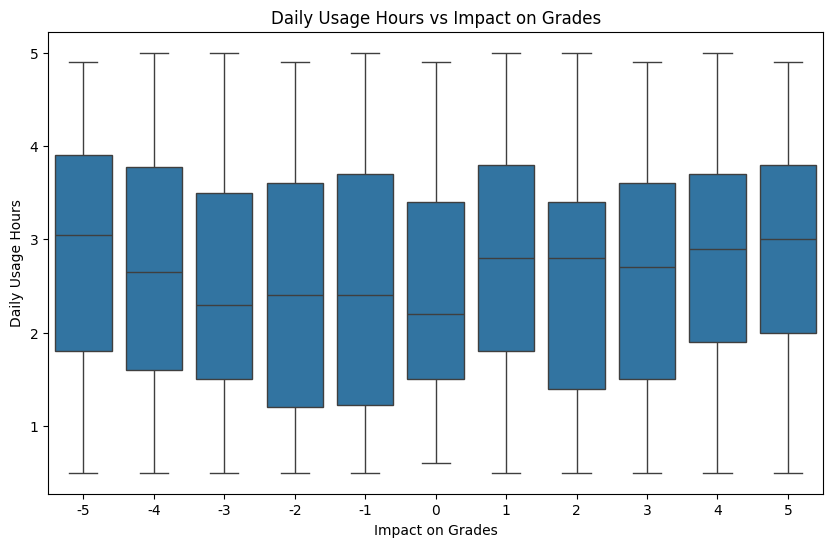

In [14]:
# Daily Usage Hours vs Impact on Grades
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x="Impact_on_Grades", y="Daily_Usage_Hours")
plt.title("Daily Usage Hours vs Impact on Grades")
plt.xlabel("Impact on Grades")
plt.ylabel("Daily Usage Hours")
plt.show()

The graph shows that daily AI usage hours varied between 0.5 and 5 hours, but there was no clear pattern between usage duration and its impact on grades. For positive and negative impacts, the distribution of usage hours was relatively similar, with a median of around 2–3 hours per day. This suggests that the duration of AI use does not directly determine improvements or declines in academic achievement.



---



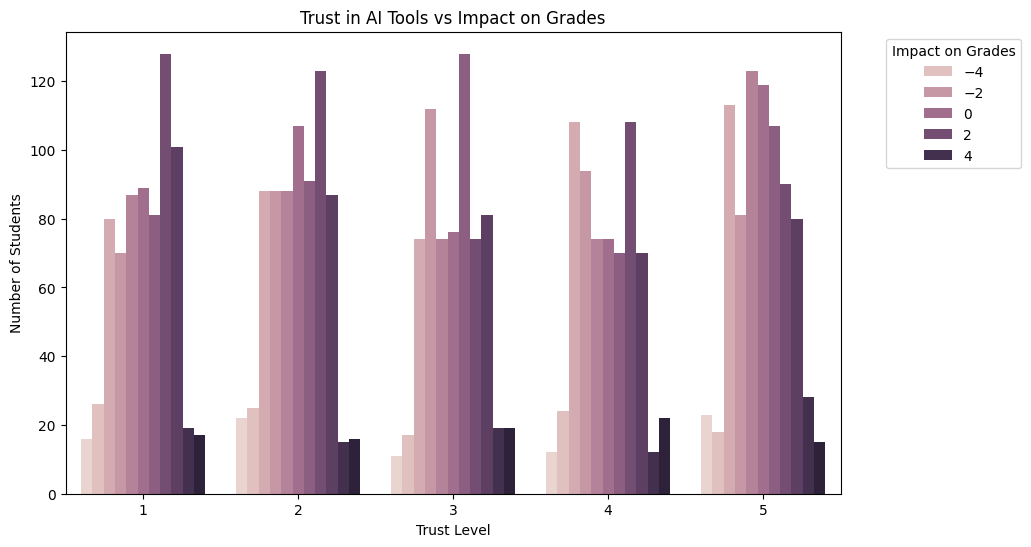

In [15]:
# Trust in AI Tools vs Impact on Grades
plt.figure(figsize=(10,6))
sns.countplot(data=data, x="Trust_in_AI_Tools", hue="Impact_on_Grades")
plt.title("Trust in AI Tools vs Impact on Grades")
plt.xlabel("Trust Level")
plt.ylabel("Number of Students")
plt.legend(title="Impact on Grades", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The graph shows the relationship between trust levels in AI tools and their impact on students' grades. Overall, across all trust levels (1 to 5), a significant number of students fell into various grade impact categories, but neutral (0) and positive (2 to 4) impacts outnumbered negative impacts. This means that the higher a student's trust in AI tools, the more likely they were to experience a positive impact on their grades, although a small percentage still experienced a negative impact.



---



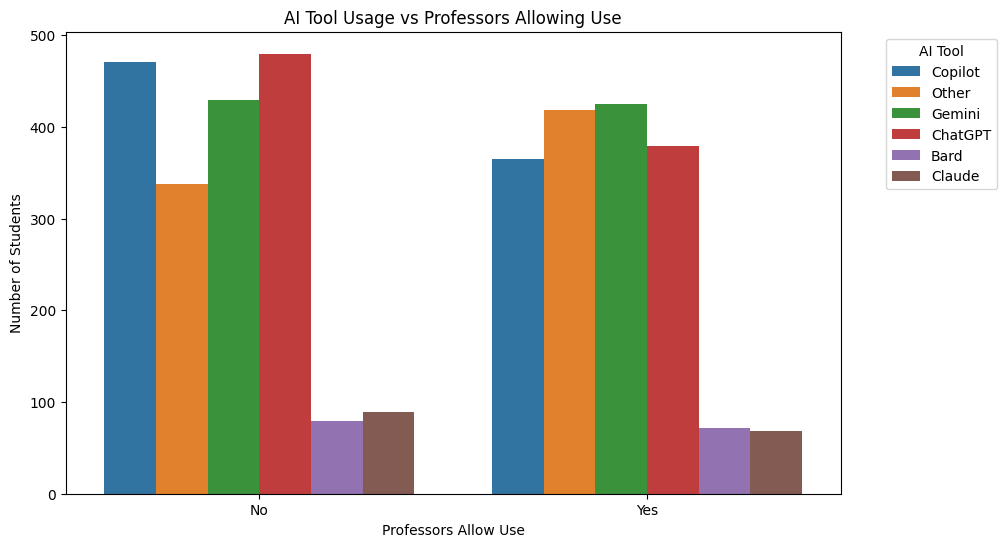

In [16]:
# Professors Allow Use vs AI Tool Usage
plt.figure(figsize=(10,6))
sns.countplot(data=data, x="Do_Professors_Allow_Use", hue="Preferred_AI_Tool")
plt.title("AI Tool Usage vs Professors Allowing Use")
plt.xlabel("Professors Allow Use")
plt.ylabel("Number of Students")
plt.legend(title="AI Tool", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The graph shows the use of various AI tools based on professor permissions. It can be seen that even when professors don't allow them, many students still use AI tools like Copilot, ChatGPT, and Gemini at high rates. However, when professors allow use, the distribution of use becomes more balanced, with the "Other" and Gemini categories showing an increasing trend. This suggests that professors' prohibitions don't completely stop AI use, but rather only slightly affect usage patterns.



---



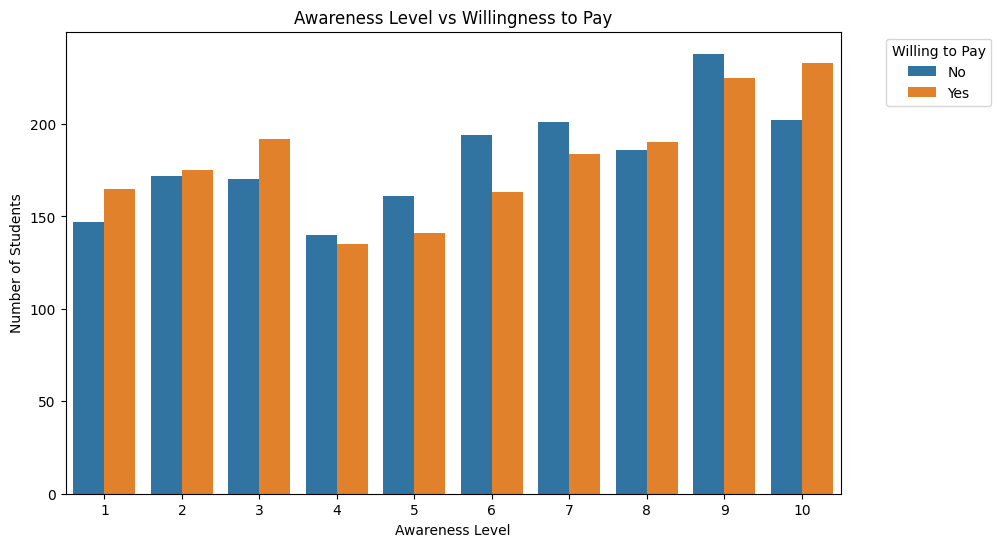

In [17]:
# Awareness Level vs Willing to Pay
plt.figure(figsize=(10,6))
sns.countplot(data=data, x="Awareness_Level", hue="Willing_to_Pay_for_Access")
plt.title("Awareness Level vs Willingness to Pay")
plt.xlabel("Awareness Level")
plt.ylabel("Number of Students")
plt.legend(title="Willing to Pay", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The graph shows the relationship between awareness level and willingness to pay. At low to medium levels of awareness, the number of students willing to pay tends to be equal to or slightly higher than those unwilling. However, at higher levels of awareness (levels 9–10), the number of students unwilling to pay remains quite significant even though the group willing to pay also increases. This indicates that as student awareness increases, the tendency to pay does increase, but resistance remains significant.



---



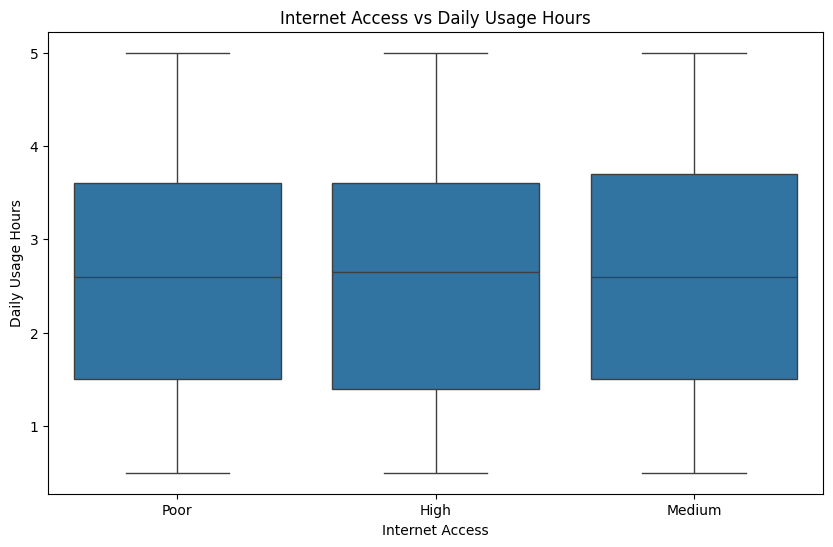

In [18]:
# Internet Access vs Daily Usage Hours
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x="Internet_Access", y="Daily_Usage_Hours")
plt.title("Internet Access vs Daily Usage Hours")
plt.xlabel("Internet Access")
plt.ylabel("Daily Usage Hours")
plt.show()

The boxplot shows that internet access level (Poor, Moderate, High) did not significantly impact daily internet usage. The median daily usage was approximately 2.5 hours for all categories, with a range of approximately 0.5 to 5 hours. This indicates that despite differences in internet access quality, students' daily usage patterns are relatively similar.



---

